In [1]:
# write down all needed imports
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt



In [2]:

 #designate the csv file data path
data_load = Path ('Resources/data.csv')

# uniform language
language = pd.read_csv(data_load,encoding="utf-8")
language.head()

,ID,Name in English,Name in French,Name in Spanish,Countries,Country codes alpha 3,ISO639-3 codes,Degree of endangerment,Alternate names,Name in the language,Number of speakers,Sources,Latitude,Longitude,Description of the location
0,1022,South Italian,italien du sud,napolitano-calabrés,Italy,ITA,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,NaN,7500000.0,NaN,40.9798,15.2490,"Campania, Lucania (Basilicata), Abruzzi (Abruz..."
1,1023,Sicilian,sicilien,siciliano,Italy,ITA,scn,Vulnerable,NaN,NaN,5000000.0,NaN,37.4399,14.5019,"Sicily (Sicilia), southern and central Calabri..."
2,383,Low Saxon,bas-saxon,bajo sajón,"Germany, Denmark, Netherlands, Poland, Russian...","DEU, DNK, NLD, POL, RUS","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",Neddersassisch,4800000.0,NaN,53.4029,10.3601,"northern Germany, the north-eastern part of th..."
3,335,Belarusian,biélorusse,bielorruso,"Belarus, Latvia, Lithuania, Poland, Russian Fe...","BRB, LVA, LTU, POL, RUS, UKR",bel,Vulnerable,NaN,NaN,4000000.0,Hienadź Cychun: Weißrussisch. — Lexikon der Sp...,53.9560,27.5756,Belarus except the Polesian-speaking south-wes...
4,382,Lombard,lombard,lombardo,"Italy, Switzerland","ITA, CHE",lmo,Definitely endangered,NaN,NaN,3500000.0,NaN,45.7215,9.3273,the region of Lombardy (except the southernmos...


In [3]:
# create dataframe that drops unnecessary columns
language_df = wine_df = language.drop(["ID", "Name in French", 'Name in Spanish', 'Country codes alpha 3', 
                                      'Name in the language', 'Sources', 'Description of the location' ], axis=1)

# drop duplicates, fill NaN object values with "None"
language_df= language_df.drop_duplicates()
language_df = language_df.dropna()
language_df

,Name in English,Countries,ISO639-3 codes,Degree of endangerment,Alternate names,Number of speakers,Latitude,Longitude
0,South Italian,Italy,nap,Vulnerable,Neapolitan; Neapolitan-Calabrese; неаполитанск...,7500000.0,40.9798,15.2490
2,Low Saxon,"Germany, Denmark, Netherlands, Poland, Russian...","act, drt, frs, gos, nds, sdz, stl, twd, vel, wep",Vulnerable,"Low German, Niedersächsisch, Nedersaksisch, Ni...",4800000.0,53.4029,10.3601
5,Romani,"Albania, Germany, Austria, Belarus, Bosnia and...","rmc, rmf, rml, rmn, rmo, rmw, rmy",Definitely endangered,"sinti, vlax, calò",3500000.0,46.3165,22.3681
6,Yiddish (Israel),Israel,ydd,Definitely endangered,Judeo-German,3000000.0,32.0833,34.8333
7,Gondi,India,gon,Vulnerable,Gondi; Gaudi; Gondiva; Gondwadi; Goondile; Gou...,2713790.0,19.5804,80.4418
...,...,...,...,...,...,...,...,...
2526,Yir Yoront,Australia,yiy,Extinct,"Yir Yiront, Jir Joront, Gwandera, Kokomindjen,...",0.0,-16.3095,141.4489
2529,Yug,Russian Federation,"yug, yuu",Extinct,Southern Ket; Sym Ket; “Yugh”,0.0,61.0901,88.1982
2532,Yurutí (Brazil),Brazil,yui,Extinct,Jurití,0.0,-0.1318,-69.1699
2533,Zeem,Nigeria,zua,Extinct,"Tule, Danshe",0.0,9.8389,9.0911


In [4]:
language_df.dtypes

Name in English            object
Countries                  object
ISO639-3 codes             object
Degree of endangerment     object
Alternate names            object
Number of speakers        float64
Latitude                  float64
Longitude                 float64
dtype: object

In [5]:
vulnerable = []
definitely_endangered = []
severley_endangered = []
critically_endangered = []
extinct = []

for index, row in language_df.iterrows():
    if row['Degree of endangerment'] == 'Vulnerable':
        vulnerable.append(row)
    elif row['Degree of endangerment'] == 'Definitely endangered':
        definitely_endangered.append(row)
    elif row['Degree of endangerment'] == 'Severely endangered':
        severley_endangered.append(row)
    elif row['Degree of endangerment'] == 'Critically endangered':
        critically_endangered.append(row) 
    elif row['Degree of endangerment'] == 'Extinct':
        extinct.append(row)


In [6]:
vulnerable_df = pd.DataFrame(vulnerable)
mean_speakers_vulnerable = vulnerable_df['Number of speakers'].mean().round()

definitely_endangered_df = pd.DataFrame(definitely_endangered)
mean_speakers_definitely = definitely_endangered_df['Number of speakers'].mean().round()

severley_endangered_df= pd.DataFrame(severley_endangered)
mean_speakers_severly = severley_endangered_df['Number of speakers'].mean().round()

critically_endangered_df = pd.DataFrame(critically_endangered)
mean_speakers_critically = critically_endangered_df['Number of speakers'].mean().round()

extinct_df = pd.DataFrame(extinct)
mean_speakers_extinct= extinct_df['Number of speakers'].mean().round()


In [7]:
data = {'Level of Endangerment': ['Vulnerable', 'Definitely Endangered', 'Severly Endangered', 'Critically Endangered', 'Extinct'],
            'Average Number of Speakers': [mean_speakers_vulnerable, mean_speakers_definitely, mean_speakers_severly, mean_speakers_critically,mean_speakers_extinct]}

speaker_df = pd.DataFrame(data)
speaker_df

,Level of Endangerment,Average Number of Speakers
0,Vulnerable,156579.0
1,Definitely Endangered,70959.0
2,Severly Endangered,16001.0
3,Critically Endangered,1289.0
4,Extinct,187.0


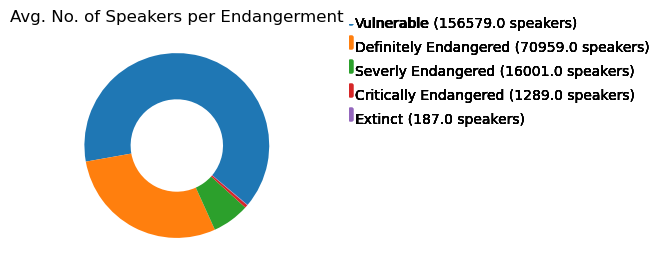

In [14]:

import matplotlib.pyplot as plt
import numpy as np

# Data for the donut chart
avg = speaker_df['Average Number of Speakers']

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Create the donut chart
wedges, texts = ax.pie(avg, wedgeprops=dict(width=0.5), startangle=-40)

# Annotation properties
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

# Annotate each wedge with speaker data
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    x = 1.4 * np.cos(np.deg2rad(ang))
    y = 1.4 * np.sin(np.deg2rad(ang))
    horizontalalignment = 'center'
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

# Create a custom legend
legend_ax = fig.add_axes([0.8, 0.1, 0.1, 0.8])  # Define the position and size of the legend axes
legend_ax.axis('off')

# Display labels and colors in the custom legend
for i, label in enumerate(speaker_df['Level of Endangerment']):
    legend_ax.add_patch(plt.Rectangle((0, 1 - i * 0.1), 0.05, 0.05, color=wedges[i].get_facecolor()))
    legend_ax.text(0.1, 1 - i * 0.1, label, va='center')
    for i, label in enumerate(speaker_df['Level of Endangerment']):
        legend_ax.add_patch(plt.Rectangle((0, 1 - i * 0.1), 0.05, 0.05, color=wedges[i].get_facecolor()))
        legend_ax.text(0.1, 1 - i * 0.1, f"{label} ({avg[i]} speakers)", va='center')

# Set the title for the plot
ax.set_title("Avg. No. of Speakers per Endangerment")
plt.savefig('avg_speakers.png')
# Display the donut chart
plt.show()



In [10]:

# Initialize a dictionary to store counts for each degree of endangerment
endangerment_counts = {'Vulnerable': 0, 'Definitely endangered': 0, 'Severely endangered': 0, 'Critically endangered': 0, 'Extinct': 0}

# Iterate through the dataset and count occurrences of each degree of endangerment
for degree in language_df['Degree of endangerment']:
    endangerment_counts[degree] += 1

# Convert the dictionary into lists for plotting
degree_names = list(endangerment_counts.keys())
counts = list(endangerment_counts.values())

# create dataframe that will be used for plotting
endangerment_df = pd.DataFrame({'Degree of Endangerment': degree_names, 'Number of languages': counts})
endangerment_df


,Degree of Endangerment,Number of languages
0,Vulnerable,370
1,Definitely endangered,371
2,Severely endangered,291
3,Critically endangered,292
4,Extinct,73


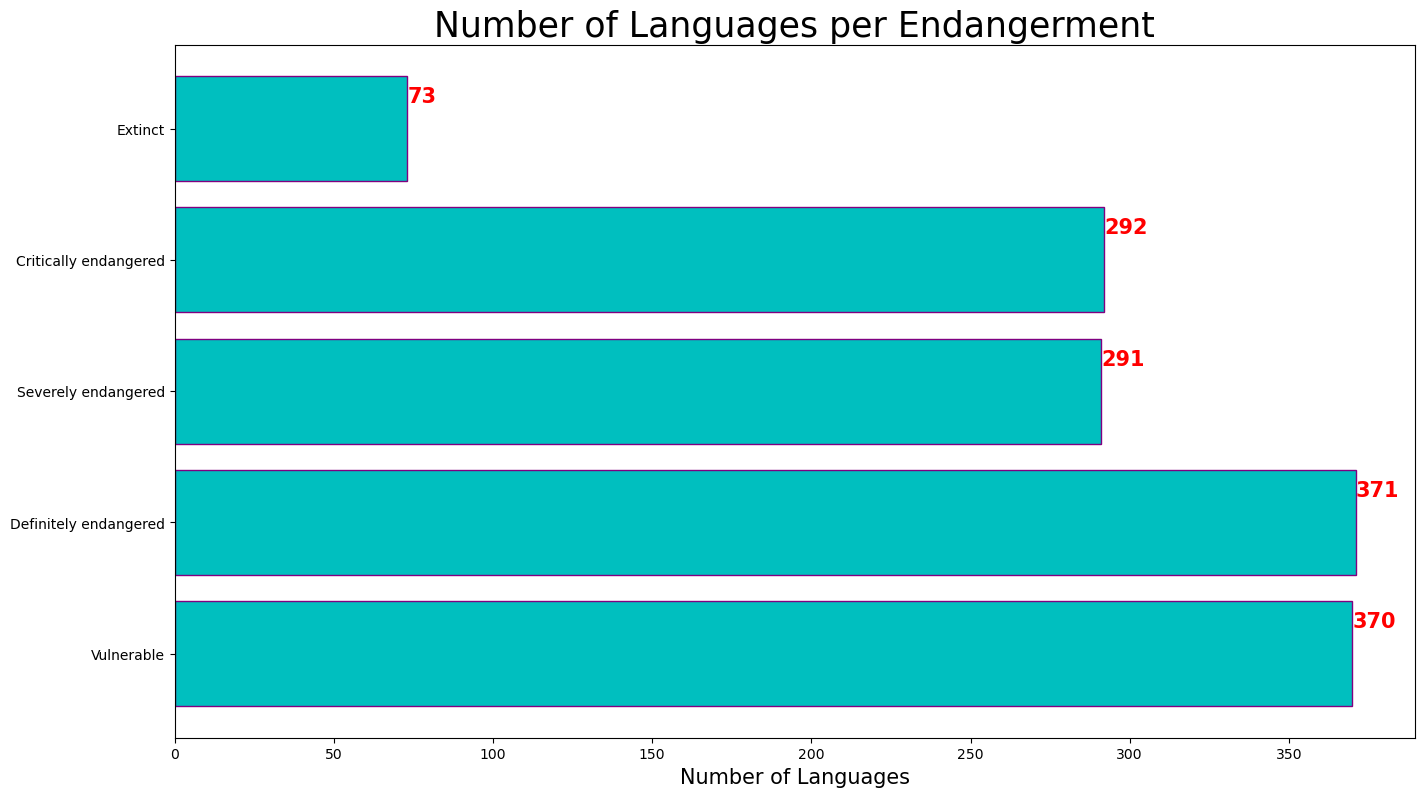

In [29]:
# defining x and y values
y=endangerment_df['Degree of Endangerment']
x=endangerment_df['Number of languages']

# set figure size
fig, ax = plt.subplots(figsize=(16, 9))

# create bar charts
ax.barh(y, x, color = 'c', edgecolor = 'purple')
 
#  add in x-values per bar in chart
for i in ax.patches:
    plt.text(i.get_width()+0.10, i.get_y()+0.6,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='red')
    # set title
ax.set_title('Number of Languages per Endangerment',
             loc='center', fontsize= 25)
ax.set_xlabel('Number of Languages', fontsize = 15) 

plt.savefig('bar.png')
 